## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2
import statsmodels.stats.outliers_influence as oi
from scipy import stats

## Prep Data

### Data Desciption

The data contains characteristics of institutions and state by year (2019-2023)

**UNITID**: (Quantitative) Unique identification number 

**INSTNM**: (Qualitative) institution name

**CITY**:   (Qualitative) city

**STABBR**: Institution's location - state

**ZIP**: (Quantitative) Zip code

**PREDDEG**: (Qualitative) predominant undergraduate award (undergraduate certificates, associate's degree, bachelor's degree, graduate degree)

**CONTROL**: (Qualitative) governance structure or type of institution (Public, Private Nonprofit, Private For-Profit)

**UGDS**: (Qualitative) number of undergraduate students

**UGDS_WHITE**: (Quantitative) percentage of undergraduate students of those who identify as White

**UGDS_BLACK**: (Quantitative) percentage of undergraduate students of those who identify as Black

**UGDS_HISP**: (Quantitative) percentage of undergraduate students of those who identify as Hispanic

**UGDS_ASIAN**: (Quantitative) percentage of undergraduate students of those who identify as Asian

**UGDS_AIAN**: (Quantitative) percentage of undergraduate students of those who identify as American Indian and Alska Native

**UGDS_NHPI**: (Quantitative) percentage of undergraduate students of those who identify as Native Hawaiian and Pacific Islander

**UGDS_UNKN**: (Quantitative) percentage of undergraduate students of those who identify as unknown

**COSTT4_A**: (Quantitative) average cost of attendance for a full-time, first-time undergrad student at 4-year institution

**UGDS_MEN**: (Quantitative) percentage of undergraduate students that identify as male

**UGDS_WOMEN**: (Quantitative) percentage of undergraduate students that identify as female

**SCORECARD_SECTOR**: (Quantitative) percentage year

**ACADEMIC_YEAR**: (Qualitative) academic year

**COLI**: (Quantitative) Cost of Living Adjustment
 
**EMI**: (Quantitative) Enrollment Mix Adjustment

**HECA**: (Quantitative) Inflation Adjustment

**CPI**: (Quantitative) Inflation Adjustment

**Tot_State_Support**: (Quantitative) Total State Support

**Tot_State_Local_Support**: (Quantitative) Total State and Local Support

**Tot_Federal_Stimulus**: (Quantitative) Total Federal Stimulus

**Tot_State_Local_Support_Excl_Fed_Stim**: (Quantitative) Total State and Local Support Excluding Federal Stimulus

**Adj_State_Support**: (Quantitative) Adjustments to State Support

**RAM**: (Quantitative) Research - Agriculture - Medical

**Tot_Ind_Support**: (Quantitative) Total Independent Support

**Tot_Financial_Aid**: (Quantitative) Total Finanacial Aid

**Education_Appropriations**: (Quantitative) Education Appropriations

**Public_Fed_Stim**: (Quantitative) Public Federal Stimulus

**Ed_Appr_Excl_Fed_Stim**: (Quantitative) Education Appropriations Excluding Federal Stimulus

**Gen_Public_Ops**: (Quantitative) General Public Operations

**State_Public_Fin_Aid_Prcnt_Ed_Appr**: (Quantitative) State Public Financial Aid as a Percent of Education Appropriations

**Net_Tuition_Fee_Revenue**: (Quantitative) Net Tuition and Fee Revenue 

**Student_Share**: (Quantitative) Student Share

**Tot_Ed_Revenue**: (Quantitative) Total Education Revenue

**Tot_Ed_Rev_Excl_Fed_Stim**: (Quantitative) Total_Education Revenue Excluding Federal Stimulus

**Net_FTE_Enrollment**: (Quantitative) Net FTE Enrollment

**State_Tax_Appr**: (Quantitative) State Tax Appropriations

**Non_Tax_Support**: (Quantitative) Non-Tax Support

**Local_Appropriations**: (Quantitative) Local Appropriations

**Fed_Stim_Used_Fin_Aid**: (Quantitative) Federal Stimulus Used for Financial Aid

**Agency_Funding**: (Quantitative) Agency Funding

**Ind_Operating**: (Quantitative) Independent Operating

**Non_Credit**: (Quantitative) Non-Credit

**State_Public_Fin_Aid**: (Quantitative) State Public Financial Aid

**Ind_Fin_Aid**: (Quantitative) Independent Financial Aid

**Out_of_State_Fin_Aid**: (Quantitative) Out-of-State Financial Aid

**Agriculture_Extension_Appr**: (Quantitative) Agriculture and Extension Appropriations

**Hospital_Appr**: (Quantitative) Hospital Appropriations

**Medical_School_Appr**: (Quantitative) Medical School Appropriations

**Research_Appropriations**: (Quantitative) Research_Appropriations

**Gross_Tuition_Fee_Revenue**: (Quantitative) Gross Tuition and Fee Revenue

**Medical_Tuition_Fee_Revenue**: (Quantitative) Medical Tuition and Fee Revenue

**Inst_Discounts_Waivers**: (Quantitative) Institutional Discounts and Waivers

**Tuit_Fees_Used_Debt_Service**: (Quantitative) Tuition and Fees Used for Debt Service

**Gross_FTE_Enrollment**: (Quantitative) Gross FTE Enrollment

**Medical_FTE_Enrollment**: (Quantitative) Medical FTE Enrollment

**SGRNT_N**: (Quantitative)

**SGRNT_P**: (Quantitative)

**SGRNT_T**: (Quantitative)

**SGRNT_A**: (Quantitative)

**PCTFLOAN**: (Qualitative) percentage of all federal undergrads receiving a federal studen loan

**GRAD_DEBT_MDN**: (Quantitative) the median debt for students who have completed a degree or certificate program

We will use the variables **PCTFLOAN** and **GRAD_DEBT_MDN** in our modeling as response variables.

In [11]:
# # read in data
df = pd.read_csv('data/merged_scorecard_shef_and_ipeds 2.csv')

# get rid of PS (post-secondary)??
df['GRAD_DEBT_MDN'] = pd.to_numeric(df['GRAD_DEBT_MDN'], errors='coerce')

# filter out non-states from dataset: PR, VI, GU, PW, FM, AS, DC?
df_clean = df[~df['State'].isna()]                              # 31923

# remove PREDDEG = 0 or 4
pred_deg = [0,4]
df_clean = df_clean[~df_clean['PREDDEG'].isin(pred_deg)]        # 28159

# rename columns
column_rename = {
    'COLI (Cost of Living) Adjustment': 'COLI', 
    'EMI (Enrollment Mix) Adjustment': 'EMI',
    'HECA (Inflation) Adjustment': 'HECA', 
    'CPI (Inflation) Adjustment': 'CPI',
    'Total State Support': 'Tot_State_Support', 
    'Total State and Local Support': 'Tot_State_Local_Support',
    'Total Federal Stimulus': 'Tot_Federal_Stimulus',
    'Total State and Local Support Excluding Federal Stimulus': 'Tot_State_Local_Support_Excl_Fed_Stim',
    'Adjustments to State Support': 'Adj_State_Support',
    'Research - Agriculture - Medical (RAM)': 'RAM', 
    'Total Independent Support': 'Tot_Ind_Support',
    'Total Financial Aid': 'Tot_Financial_Aid', 
    'Education Appropriations': 'Education_Appropriations',
    'Public Federal Stimulus': 'Public_Fed_Stim',
    'Education Appropriations Excluding Federal Stimulus': 'Ed_Appr_Excl_Fed_Stim',
    'General Public Operations': 'Gen_Public_Ops',
    'State Public Financial Aid as a Percent of Education Appropriations': 'State_Public_Fin_Aid_Prcnt_Ed_Appr',
    'Net Tuition and Fee Revenue': 'Net_Tuition_Fee_Revenue', 
    'Student Share': 'Student_Share',
    'Total Education Revenue': 'Tot_Ed_Revenue',
    'Total Education Revenue Excluding Federal Stimulus': 'Tot_Ed_Rev_Excl_Fed_Stim',
    'Net FTE Enrollment': 'Net_FTE_Enrollment', 
    'State Tax Appropriations': 'State_Tax_Appr', 
    'Non-Tax Support': 'Non_Tax_Support',
    'Local Appropriations': 'Local_Appropriations', 
    'Federal Stimulus Used for Financial Aid': 'Fed_Stim_Used_Fin_Aid',
    'Agency Funding': 'Agency_Funding', 
    'Independent Operating': 'Ind_Operating', 
    'Non-Credit': 'Non_Credit',
    'State Public Financial Aid': 'State_Public_Fin_Aid', 
    'Independent Financial Aid': 'Ind_Fin_Aid',
    'Out-of-State Financial Aid': 'Out_of_State_Fin_Aid',
    'Agriculture and Extension Appropriations': 'Agriculture_Extension_Appr', 
    'Hospital Appropriations': 'Hospital_Appr',
    'Medical School Appropriations': 'Medical_School_Appr', 
    'Research Appropriations': 'Research_Appropriations',
    'Gross Tuition and Fee Revenue': 'Gross_Tuition_Fee_Revenue', 
    'Medical Tuition and Fee Revenue': 'Medical_Tuition_Fee_Revenue',
    'Institutional Discounts and Waivers': 'Inst_Discounts_Waivers',
    'Tuition and Fees Used for Debt Service': 'Tuit_Fees_Used_Debt_Service', 
    'Gross FTE Enrollment': 'Gross_FTE_Enrollment',
    'Medical FTE Enrollment': 'Medical_FTE_Enrollment'
}
df_clean = df_clean.rename(columns=column_rename)

# move columns for simplicity
new_order = ['UNITID', 'INSTNM', 'FY', 'State', 'CITY', 'ZIP', 'PREDDEG', 'CONTROL', 'UGDS',
       'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
       'UGDS_NHPI', 'UGDS_UNKN', 'COSTT4_A',
       'UGDS_MEN', 'UGDS_WOMEN', 'SCORECARD_SECTOR', 'COLI',
       'EMI', 'HECA', 'CPI', 'Tot_State_Support', 'Tot_State_Local_Support',
       'Tot_Federal_Stimulus', 'Tot_State_Local_Support_Excl_Fed_Stim',
       'Adj_State_Support', 'RAM', 'Tot_Ind_Support', 'Tot_Financial_Aid',
       'Education_Appropriations', 'Public_Fed_Stim', 'Ed_Appr_Excl_Fed_Stim',
       'Gen_Public_Ops', 'State_Public_Fin_Aid_Prcnt_Ed_Appr',
       'Net_Tuition_Fee_Revenue', 'Student_Share', 'Tot_Ed_Revenue',
       'Tot_Ed_Rev_Excl_Fed_Stim', 'Net_FTE_Enrollment', 'State_Tax_Appr',
       'Non_Tax_Support', 'Local_Appropriations', 'Fed_Stim_Used_Fin_Aid',
       'Agency_Funding', 'Ind_Operating', 'Non_Credit', 'State_Public_Fin_Aid',
       'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'Agriculture_Extension_Appr',
       'Hospital_Appr', 'Medical_School_Appr', 'Research_Appropriations',
       'Gross_Tuition_Fee_Revenue', 'Medical_Tuition_Fee_Revenue',
       'Inst_Discounts_Waivers', 'Tuit_Fees_Used_Debt_Service',
       'Gross_FTE_Enrollment', 'Medical_FTE_Enrollment', 'SGRNT_N', 'SGRNT_P', 
       'SGRNT_T', 'SGRNT_A', 'PCTFLOAN', 'GRAD_DEBT_MDN']

state = ['COLI','EMI', 'HECA', 'CPI', 'Tot_State_Support', 'Tot_State_Local_Support',
       'Tot_Federal_Stimulus', 'Tot_State_Local_Support_Excl_Fed_Stim',
       'Adj_State_Support', 'RAM', 'Tot_Ind_Support', 'Tot_Financial_Aid',
       'Education_Appropriations', 'Public_Fed_Stim', 'Ed_Appr_Excl_Fed_Stim',
       'Gen_Public_Ops', 'State_Public_Fin_Aid_Prcnt_Ed_Appr',
       'Net_Tuition_Fee_Revenue', 'Student_Share', 'Tot_Ed_Revenue',
       'Tot_Ed_Rev_Excl_Fed_Stim', 'Net_FTE_Enrollment', 'State_Tax_Appr',
       'Non_Tax_Support', 'Local_Appropriations', 'Fed_Stim_Used_Fin_Aid',
       'Agency_Funding', 'Ind_Operating', 'Non_Credit', 'State_Public_Fin_Aid',
       'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'Agriculture_Extension_Appr',
       'Hospital_Appr', 'Medical_School_Appr', 'Research_Appropriations',
       'Gross_Tuition_Fee_Revenue', 'Medical_Tuition_Fee_Revenue',
       'Inst_Discounts_Waivers', 'Tuit_Fees_Used_Debt_Service',
       'Gross_FTE_Enrollment', 'Medical_FTE_Enrollment']

state_features = ['Gross_Tuition_Fee_Revenue', 'State_Public_Fin_Aid', 'Ind_Fin_Aid', 'Out_of_State_Fin_Aid',
                  'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid']

df_clean = df_clean[new_order]

# set up categorical columns
df_clean['INSTNM'] = df_clean['INSTNM'].astype('category')
df_clean['State'] = df_clean['State'].astype('category')
df_clean['CITY'] = df_clean['CITY'].astype('category')
df_clean['FY'] = df_clean['FY'].astype(int).astype('category')
df_clean['PREDDEG'] = df_clean['PREDDEG'].astype('category')
df_clean['CONTROL'] = df_clean['CONTROL'].astype('category')
df_clean['SCORECARD_SECTOR'] = df_clean['SCORECARD_SECTOR'].astype('category')

# filter on just 4 year institutions
df_clean = df_clean[df_clean['PREDDEG'] == 3]

# dataframe info
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10099 entries, 0 to 33975
Data columns (total 68 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   UNITID                                 10099 non-null  int64   
 1   INSTNM                                 10099 non-null  category
 2   FY                                     10099 non-null  category
 3   State                                  10099 non-null  category
 4   CITY                                   10099 non-null  category
 5   ZIP                                    10099 non-null  object  
 6   PREDDEG                                10099 non-null  category
 7   CONTROL                                10099 non-null  category
 8   UGDS                                   10090 non-null  float64 
 9   UGDS_WHITE                             10090 non-null  float64 
 10  UGDS_BLACK                             10090 non-null  float64 

## EDA

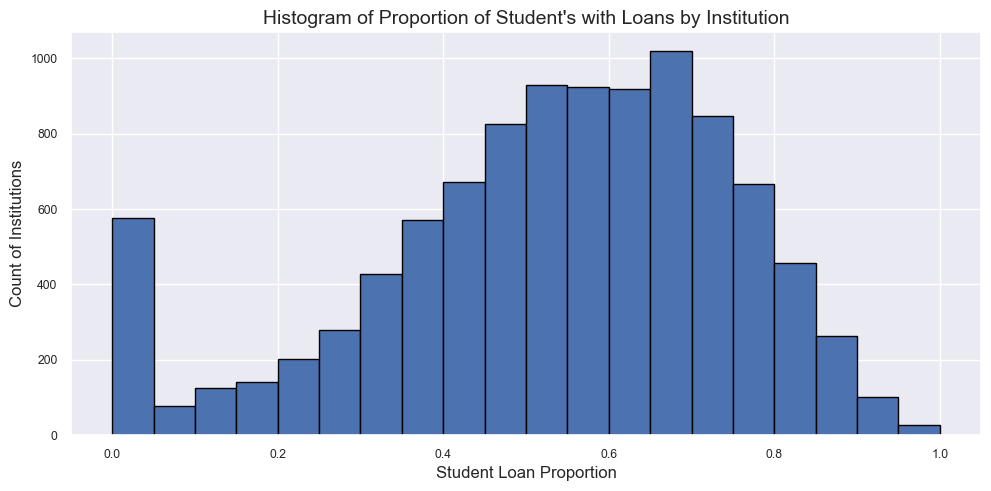

In [107]:
# Histogram of the response variable
df_hist = df_clean[df_clean['PCTFLOAN'].notna()]
plt.figure(figsize=(10, 5))
plt.hist(df_hist['PCTFLOAN'], bins=20, edgecolor='black')
plt.xlabel('Student Loan Proportion', fontsize=12)
plt.ylabel('Count of Institutions', fontsize=12)
plt.title('Histogram of Proportion of Student\'s with Loans by Institution', fontsize=14)
plt.tight_layout()
plt.show()

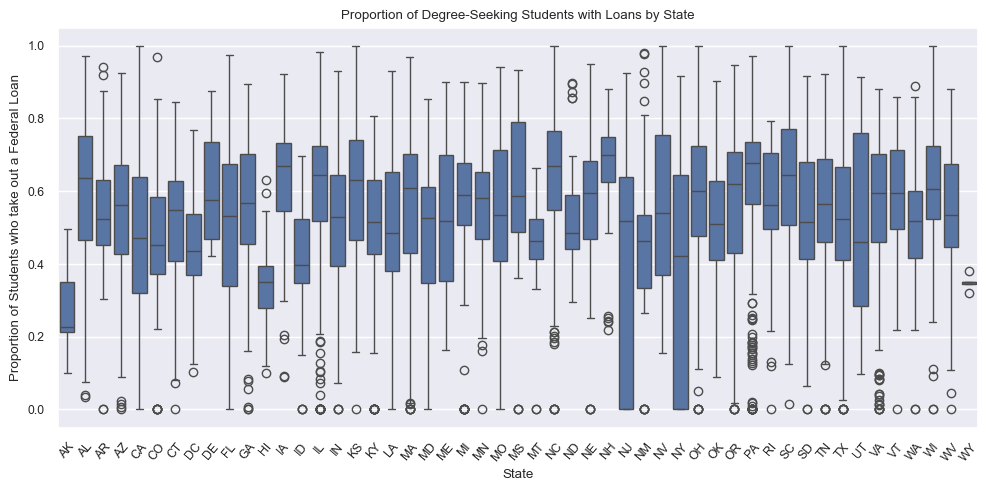

In [103]:
# Set up the plotting area
plt.figure(figsize=(10, 5))

# Boxplot for Variation of Percent of Student Loans
sns.boxplot(x='State', y='PCTFLOAN', data=df_hist)
sns.set(font_scale=.8)
plt.title('Proportion of Degree-Seeking Students with Loans by State')
plt.ylabel('Proportion of Students who take out a Federal Loan')
plt.xlabel('State')
plt.xticks(rotation=50)  # Rotates the X-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

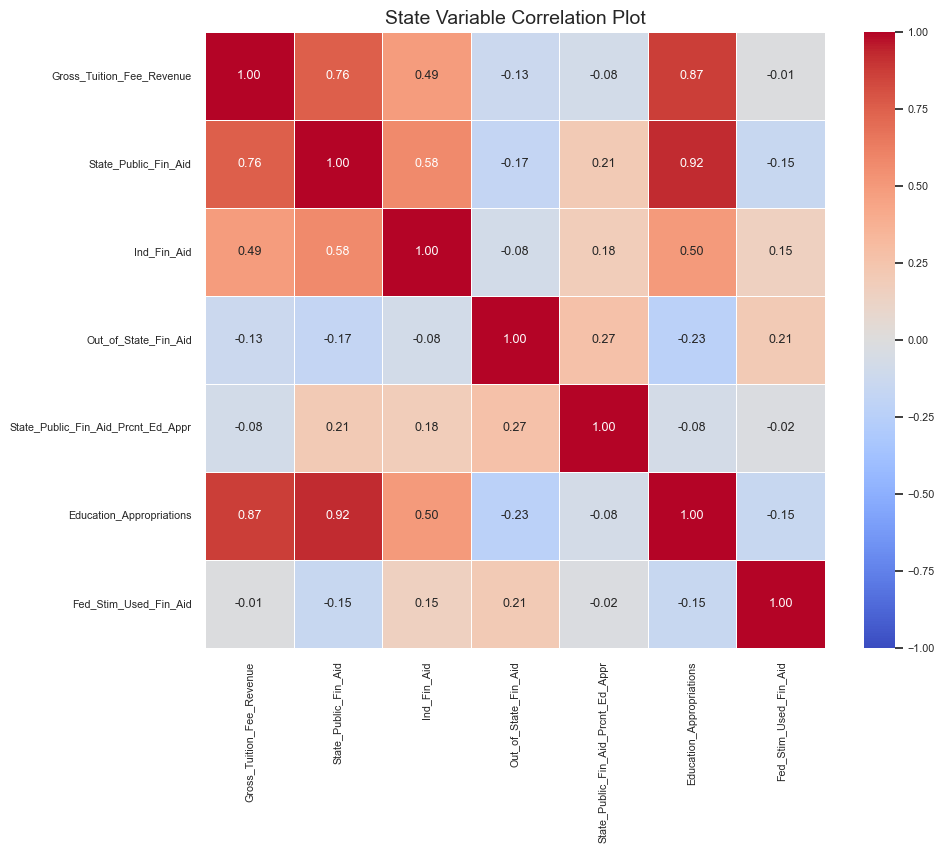

In [111]:
#Correlation Plot for numerical data
numerical_df = df_clean[state_features]
# numerical_df = df_clean.iloc[:,30:61]
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 9})
sns.set(font_scale=0.7)
plt.title('State Variable Correlation Plot', fontsize=14)
plt.tight_layout
plt.show()

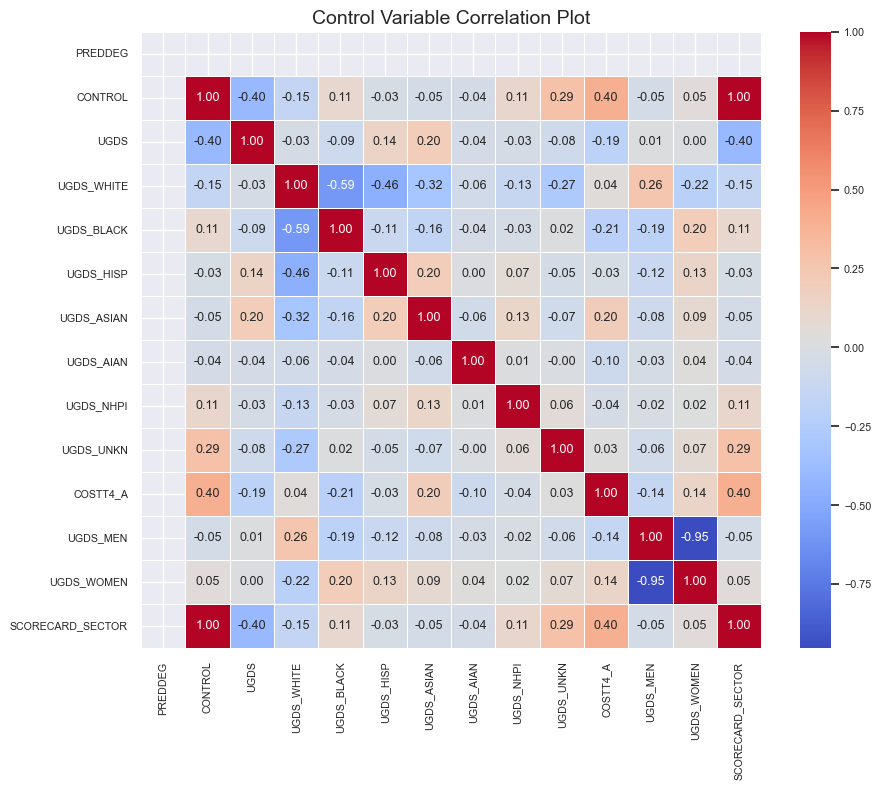

In [110]:
control = ['PREDDEG', 'CONTROL', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN',
           'UGDS_NHPI', 'UGDS_UNKN', 'COSTT4_A', 'UGDS_MEN', 'UGDS_WOMEN', 'SCORECARD_SECTOR',]
# Correlation Plot for numerical control data
num_control_df = df_clean[control]
# numerical_df = df_clean.iloc[:,30:61]
correlation_matrix = num_control_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={'size': 9})
sns.set(font_scale=0.7)
plt.title('Control Variable Correlation Plot', fontsize=14)
plt.tight_layout
plt.show()

Based on this, we can drop scorecard_sector as they are perfectly co-linear with control. And we can drop UGDS_MEN as that is nearly perfectly inversely related to UGDS_WOMEN.

## Analysis

### Data Preparation

In [84]:
# filter out rows without a PCTFLOAN value
log_df = df_clean[df_clean['PCTFLOAN'].notna()]

# get rid of columns that don't matter
general_ex = ['UNITID', 'INSTNM', 'ZIP', 'CITY', 'GRAD_DEBT_MDN', 'State']
control_ex = ['UGDS_MEN', 'SCORECARD_SECTOR']
state_ex = [feature for feature in state if feature not in state_features]
columns_to_drop = general_ex + control_ex + state_ex
log_df = log_df.drop(columns=columns_to_drop, axis=1)

# identify features with nan
nan_counts = log_df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_table = nan_counts.reset_index()
nan_table.columns = ['Column', 'NaN Count']
print(nan_table)

# get rid of values without UGDS numbers and SGRNT_N/P/T values
log_df = log_df.dropna(subset=['SGRNT_N'])
log_df = log_df.dropna(subset=['UGDS', 'UGDS_WHITE'])

# impute the COSTT4_A, Fed_Stim_Used_Fin_Aid, Medical_Tuition_Fee_Revenue, Tuit_Fees_Used_Debt_Service values
imp = IterativeImputer(max_iter=10)
log_df[['COSTT4_A']] = imp.fit_transform(log_df[['COSTT4_A']])
log_df[['Fed_Stim_Used_Fin_Aid']] = imp.fit_transform(log_df[['Fed_Stim_Used_Fin_Aid']])
# log_df[['Medical_Tuition_Fee_Revenue']] = imp.fit_transform(log_df[['Medical_Tuition_Fee_Revenue']])
# log_df[['Tuit_Fees_Used_Debt_Service']] = imp.fit_transform(log_df[['Tuit_Fees_Used_Debt_Service']])

# set NA SGRNT_A values to zero where na
log_df['SGRNT_A'] = log_df['SGRNT_A'].fillna(0)
# log_df['Agency_Funding'] = log_df['Agency_Funding'].fillna(0)
# log_df['Ind_Operating'] = log_df['Ind_Operating'].fillna(0)
# log_df['Inst_Discounts_Waivers'] = log_df['Inst_Discounts_Waivers'].fillna(0)

# recheck for NaNs
nan_counts = log_df.isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_table = nan_counts.reset_index()
nan_table.columns = ['Column', 'NaN Count']
print(nan_table)

# set up columns for design matrix
X = log_df.drop(columns = ['PCTFLOAN', 'UGDS'], axis=1)
y = log_df['PCTFLOAN']
freq_weights = log_df['UGDS']

# split up the X and Y data into training and testing
X_train_raw, X_test_raw, y_train, y_test, w_train, w_test = train_test_split(
    X, y, freq_weights, test_size=0.2, random_state=42
)
# set up categorical vs numerical columns
categorical = ['FY','PREDDEG','CONTROL']
numerical = X.columns.difference(categorical).tolist()

# scale train and test numerical values independently
scaler = StandardScaler()
X_train_num = X_train_raw[numerical]
X_test_num = X_test_raw[numerical]
# fit to scaler and then combine with dummy variables
X_train_num[numerical] = scaler.fit_transform(X_train_raw[numerical])
X_train_categorical = pd.get_dummies(X_train_raw[categorical], drop_first=True).astype(int)
X_train = pd.concat([X_train_num,X_train_categorical], axis=1)
X_test_num[numerical] = scaler.fit_transform(X_test_raw[numerical])
X_test_categorical = pd.get_dummies(X_test_raw[categorical], drop_first=True).astype(int)
X_test = pd.concat([X_test_num,X_test_categorical], axis=1)

# confirm number of columns
print(len(X_train.columns))

                   Column  NaN Count
0                    UGDS          2
1              UGDS_WHITE          2
2              UGDS_BLACK          2
3               UGDS_HISP          2
4              UGDS_ASIAN          2
5               UGDS_AIAN          2
6               UGDS_NHPI          2
7               UGDS_UNKN          2
8                COSTT4_A        927
9              UGDS_WOMEN          2
10  Fed_Stim_Used_Fin_Aid       8082
11                SGRNT_N        874
12                SGRNT_P        874
13                SGRNT_T        874
14                SGRNT_A       1906
Empty DataFrame
Columns: [Column, NaN Count]
Index: []
28


/var/folders/y0/6_l3s2r147zb5njrsxhlx0b40000gn/T/ipykernel_75194/2457819601.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_num[numerical] = scaler.fit_transform(X_train_raw[numerical])
/var/folders/y0/6_l3s2r147zb5njrsxhlx0b40000gn/T/ipykernel_75194/2457819601.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_num[numerical] = scaler.fit_transform(X_test_raw[numerical])


### Overall Test for Signficance

In [54]:
# train the full_model
full_model = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
full_model_llf = full_model.llf
print(full_model.summary())

# train the reduced_model
subset_features =  ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_UNKN', 'COSTT4_A', 'UGDS_WOMEN',
                    # 'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA', 
                    # 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 
                    # 'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH', 
                    # 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 
                    # 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY', 
                    'FY_2017', 'FY_2018', 'FY_2019', 'FY_2020', 'PREDDEG_2', 'PREDDEG_3', 'CONTROL_2', 'CONTROL_3', 'SGRNT_N', 'SGRNT_P', 'SGRNT_T', 'SGRNT_A',]
X_train_reduced = pd.DataFrame(X_train[subset_features])

# run the reduced model
reduced_model = sm.GLM(y_train, sm.add_constant(X_train_reduced), family = sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
reduced_model_llf = reduced_model.llf

                 Generalized Linear Model Regression Results                  
Dep. Variable:               PCTFLOAN   No. Observations:                 7331
Model:                            GLM   Df Residuals:                 34428823
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5508e+07
Date:                Fri, 25 Jul 2025   Deviance:                   2.1907e+06
Time:                        09:18:13   Pearson chi2:                 2.06e+06
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
COST

In [66]:
# print the significant coefficients  -1.5569e+07
coef_df = pd.DataFrame({
    'coef': full_model.params.values,
    'pvalues': full_model.pvalues
})

# print the signficant pvalues
sig_coef = coef_df[coef_df['pvalues'] < 0.05]
print(f"There are {len(sig_coef)} significant coefficients.")

# determine the significance
gstat = -2 * (reduced_model_llf - full_model_llf)
df = len(full_model.params) - 1 
p_value = stats.chi2.sf(gstat, df)
print('G Statistic: ', round(gstat,4))
print('P-value: ', round(p_value, 6))

There are 28 significant coefficients.
G Statistic:  121661.4854
P-value:  0.0


## Variable Selection

### Check for Multi-collinearity

In [114]:
# check for multi-collinearity
X_train_with_const = sm.add_constant(X_train)

vifs = pd.DataFrame({
  'Variable': X_train_with_const.columns,
  'VIF': [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
})

gvifs = pd.DataFrame({
    'Variable': vifs['Variable'],
    'GVIF': vifs['VIF'],
})

gvifs['GVIF^(1/(2*Df))'] = np.sqrt(gvifs['GVIF'])

gvifs = gvifs[gvifs['Variable'] != 'const']

print(gvifs)

                              Variable       GVIF  GVIF^(1/(2*Df))
0                             COSTT4_A   2.320985         1.523478
1             Education_Appropriations  27.985368         5.290120
2                Fed_Stim_Used_Fin_Aid   1.050168         1.024777
3            Gross_Tuition_Fee_Revenue   5.351397         2.313309
4                          Ind_Fin_Aid   1.885293         1.373060
5                 Out_of_State_Fin_Aid   1.233333         1.110555
6                              SGRNT_A   1.758209         1.325975
7                              SGRNT_N   6.593432         2.567768
8                              SGRNT_P   1.837323         1.355479
9                              SGRNT_T   5.721657         2.391999
10                State_Public_Fin_Aid  19.699619         4.438425
11  State_Public_Fin_Aid_Prcnt_Ed_Appr   2.919712         1.708717
12                           UGDS_AIAN   1.239268         1.113224
13                          UGDS_ASIAN   2.795233         1.67

/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Looks like a couple of variables have high multi-collinearity, which isn't unexpected. The Education Appropriations and State Public Financial Aid are over the 10 threshold, while UGDS_White/PREDDEG_3 are right on the line.

### Regularization Modeling

In [43]:
# LASSO REGRESSION
# configure alphas
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # Different values for alpha (regularization strength)
scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# L1 Regularization (Lasso)
for alpha in alphas:
    print(alpha)
    fold_mse = []
    for train_idx, test_idx in kf.split(X_train):
        X_train_k, X_test_k = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_k, y_test_k = y_train.iloc[train_idx], y_train.iloc[test_idx]
        w_train_k, w_test_k = w_train.iloc[train_idx], w_train.iloc[test_idx]

        model = GLM(y_train_k, sm.add_constant(X_train_k), family=families.Binomial(), freq_weights=w_train_k)
        result = model.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=1)

        y_pred = result.predict(X_test_k)
        mse = np.mean(np.square(y_pred - y_test_k))
        fold_mse.append(mse)
    
    avg_mse = np.mean(fold_mse)
    scores.append(avg_mse)
    print(f"Alpha = {alpha}, CV MSE = {avg_mse:.6f}")

best_score = min(scores)
min_indices = [i for i, e in enumerate(scores) if e == best_score]
best_alpha = max(alphas[i] for i in min_indices)

print(f"Optimal Alpha: {best_alpha}")

# Print the Coefficients for optimal alpha
model_l1 = GLM(y_train, sm.add_constant(X_train), family=families.Binomial(), freq_weights=w_train)
results = model_l1.fit_regularized(method='elastic_net', alpha=best_alpha, L1_wt=1)
print(results.params)

0.001


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.001, CV MSE = 0.028965
0.01


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.01, CV MSE = 0.028966
0.1


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.1, CV MSE = 0.029056
1.0


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 1.0, CV MSE = 0.029559
10.0


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 10.0, CV MSE = 0.030808
Optimal Alpha: 0.001
COSTT4_A                              0.200405
Education_Appropriations             -0.116214
Fed_Stim_Used_Fin_Aid                 0.035844
Gross_Tuition_Fee_Revenue             0.162120
Ind_Fin_Aid                          -0.024314
Out_of_State_Fin_Aid                 -0.010264
SGRNT_A                               0.037622
SGRNT_N                              -0.068069
SGRNT_P                               0.168000
SGRNT_T                               0.014483
State_Public_Fin_Aid                  0.034533
State_Public_Fin_Aid_Prcnt_Ed_Appr   -0.103082
UGDS_AIAN                             0.047685
UGDS_ASIAN                           -0.020535
UGDS_BLACK                            0.632370
UGDS_HISP                             0.155805
UGDS_NHPI                             0.070984
UGDS_UNKN                             0.172118
UGDS_WHITE                            0.548941
UGDS_WOMEN                            0.170656
FY_2017

/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


In [45]:
# ELASTIC NET REGRESSION
# configure alphas
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # Different values for alpha (regularization strength)
scores = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# L1 Regularization (Lasso)
for alpha in alphas:
    print(alpha)
    fold_mse = []
    for train_idx, test_idx in kf.split(X_train):
        X_train_k, X_test_k = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_train_k, y_test_k = y_train.iloc[train_idx], y_train.iloc[test_idx]
        w_train_k, w_test_k = w_train.iloc[train_idx], w_train.iloc[test_idx]

        model = GLM(y_train_k, sm.add_constant(X_train_k), family=families.Binomial(), freq_weights=w_train_k)
        result = model.fit_regularized(method='elastic_net', alpha=alpha, L1_wt=0.5)

        y_pred = result.predict(X_test_k)
        mse = np.mean(np.square(y_pred - y_test_k))
        fold_mse.append(mse)
    
    avg_mse = np.mean(fold_mse)
    scores.append(avg_mse)
    print(f"Alpha = {alpha}, CV MSE = {avg_mse:.6f}")

best_score = min(scores)
min_indices = [i for i, e in enumerate(scores) if e == best_score]
best_alpha = max(alphas[i] for i in min_indices)

print(f"Optimal Alpha: {best_alpha}")

# Print the Coefficients for optimal alpha
model_eln = GLM(y_train, sm.add_constant(X_train), family=families.Binomial(), freq_weights=w_train)
results_eln = model_eln.fit_regularized(method='elastic_net', alpha=best_alpha, L1_wt=0.5)
print(results_eln.params)

0.001


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.001, CV MSE = 0.028965
0.01


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.01, CV MSE = 0.028965
0.1


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 0.1, CV MSE = 0.028973
1.0


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 1.0, CV MSE = 0.029383
10.0


/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")
/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fittin

Alpha = 10.0, CV MSE = 0.030448
Optimal Alpha: 0.001
COSTT4_A                              0.200412
Education_Appropriations             -0.116226
Fed_Stim_Used_Fin_Aid                 0.035845
Gross_Tuition_Fee_Revenue             0.162125
Ind_Fin_Aid                          -0.024316
Out_of_State_Fin_Aid                 -0.010265
SGRNT_A                               0.037623
SGRNT_N                              -0.068071
SGRNT_P                               0.168003
SGRNT_T                               0.014483
State_Public_Fin_Aid                  0.034542
State_Public_Fin_Aid_Prcnt_Ed_Appr   -0.103086
UGDS_AIAN                             0.047689
UGDS_ASIAN                           -0.020531
UGDS_BLACK                            0.632382
UGDS_HISP                             0.155813
UGDS_NHPI                             0.070990
UGDS_UNKN                             0.172122
UGDS_WHITE                            0.548957
UGDS_WOMEN                            0.170656
FY_2017

/opt/anaconda3/envs/py_env/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1464: UserWarning: Elastic net fitting did not converge
  warnings.warn("Elastic net fitting did not converge")


### Stepwise Regression

In [167]:
# Forward Stepwise
def forward_selection(test_type, x_data, y_data, w_train=None, ic='aic', min_X=None, max_X=None):
    # pull the data
    y = y_data
    X = x_data

    # configure required variables
    initial_features = X.columns.tolist()
    best_features = []
    ic_history = []
    current_ic = np.inf
    test = []

    # Initialize the model with min_X if provided
    if min_X:
        best_features = min_X
        initial_features = [feature for feature in initial_features if feature not in best_features]

    if max_X:
        initial_features = max_X

    ic_with_candidates = [('', '')]
    while len(initial_features) > 0:
        final_ic, final_feature = ic_with_candidates[0]
        ic_with_candidates = []
        for feature in initial_features:

            features_to_test = best_features.copy()
            features_to_test.append(feature)

            if test_type.lower() == 'ols':
                tested_model = sm.OLS(y, sm.add_constant(X[features_to_test])).fit()
            elif test_type.lower() == 'logit':
                tested_model = sm.GLM(y, sm.add_constant(X[features_to_test]), family=sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
            elif test_type.lower() == 'poisson':
                tested_model = sm.GLM(y, sm.add_constant(X[features_to_test]), family=sm.families.Poisson()).fit()
            else:
                raise TypeError("ERROR: only 'OLS', 'LOGIT' or 'Poisson' are currently supported")

            if ic.lower() == 'aic':
                ic_with_candidates.append((tested_model.aic, feature))
                IC = 'AIC'
            elif ic.lower() == 'bic':
                ic_with_candidates.append((tested_model.bic, feature))
                IC = 'BIC'
            else:
                raise TypeError("ERROR: only 'AIC' or 'BIC' are supported")


        ic_with_candidates.sort()
        best_ic, best_feature = ic_with_candidates[0]

        if best_ic < current_ic:
            current_ic = best_ic
            best_features.append(best_feature)
            initial_features.remove(best_feature)
            ic_history.append(best_ic)
        else:
            print('======================================================================================')
            print(f'Final Selected Features: {best_features} \t {IC}: {np.round(final_ic, 3)}')
            print('======================================================================================')
            test = 1
            break
        print(f'Selected Features so far: {best_features} \t {IC}: {np.round(best_ic, 3)}')

    if test !=1: # in case the while loop condition was met before the current (best_ic (NOT) < current_ic)
        print('======================================================================================')
        print(f'Final Selected Features: {best_features} \t {IC}: {np.round(final_ic, 3)}')
        print('======================================================================================')

    return best_features, ic_history


forward_aic_features, _  = forward_selection('logit', X_train, y_train, w_train=w_train, ic='aic', min_X=None, max_X=None)


Selected Features so far: ['UGDS_ASIAN'] 	 AIC: 32040053.45
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK'] 	 AIC: 31709911.381
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A'] 	 AIC: 31538156.968
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN'] 	 AIC: 31434536.835
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE'] 	 AIC: 31383957.947
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue'] 	 AIC: 31318305.598
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue', 'UGDS_UNKN'] 	 AIC: 31263681.435
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue', 'UGDS_UNKN', 'UGDS_HISP'] 	 AIC: 31221308.727
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHIT

In [ ]:
print(len(forward_aic_features))
forward_state_features = [feature for feature in forward_aic_features if feature not in subset_features]
missing_f_features = [feature for feature in X_train.columns.tolist() if feature not in forward_aic_features]
print(len(forward_state_features))
print(forward_state_features)
print(missing_f_features)

26
7
['Gross_Tuition_Fee_Revenue', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Ind_Fin_Aid', 'State_Public_Fin_Aid', 'Out_of_State_Fin_Aid']
['PREDDEG_2', 'PREDDEG_3']


In [169]:
# Backward regression
def backward_selection(test_type, x_data, y_data, w_train=None, ic='aic', min_X=None, max_X=None):

    y = y_data
    X = x_data

    initial_features = X.columns.tolist()
    best_features = initial_features
    ic_history = []
    current_ic = np.inf
    test = []

    # Initialize the model with max_X if provided
    if max_X:
        best_features = max_X

    ic_with_candidates = [('', '')]
    while len(initial_features) > 0:

        final_ic, final_feature = ic_with_candidates[0]
        ic_with_candidates = []

        non_droppable_features = min_X if min_X is not None else []
        droppable_features = [feature for feature in best_features if feature not in non_droppable_features]

        for feature in droppable_features:
            features_to_test = [f for f in best_features if f != feature]
            if test_type.lower() == 'ols':
                tested_model = sm.OLS(y, sm.add_constant(X[features_to_test])).fit()
            elif test_type.lower() == 'logit':
                tested_model = sm.GLM(y, sm.add_constant(X[features_to_test]), family=sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
            elif test_type.lower() == 'poisson':
                tested_model = sm.GLM(y, sm.add_constant(X[features_to_test]), family=sm.families.Poisson()).fit()
            else:
                raise TypeError("ERROR: only 'OLS', 'LOGIT' or 'Poisson' are currently supported")

            if ic.lower() == 'aic':
                ic_with_candidates.append((tested_model.aic, feature))
                IC = 'AIC'
            elif ic.lower() == 'bic':
                ic_with_candidates.append((tested_model.bic, feature))
                IC = 'BIC'
            else:
                raise TypeError("ERROR: only 'AIC' or 'BIC' are supported")

        ic_with_candidates.sort()
        best_ic, worst_feature = ic_with_candidates[0]

        if best_ic < current_ic:
            current_ic = best_ic
            best_features.remove(worst_feature)
            ic_history.append(current_ic)
        else:
            print('======================================================================================')
            print(f'Final Selected Features: {best_features} \t {IC}: {np.round(final_ic, 3)}')
            print('======================================================================================')
            test = 1
            break
        print(f'Selected Features so far: {best_features} \t {IC}: {np.round(best_ic, 3)}')

    if test !=1: # in case the while loop condition was met before the current (best_ic (NOT) < current_ic)
        print('======================================================================================')
        print(f'Final Selected Features: {best_features} \t {IC}: {np.round(final_ic, 3)}')
        print('======================================================================================')

    return best_features, ic_history

backward_aic_features, _ = backward_selection('logit', X_train, y_train, w_train, ic='aic', min_X=None, max_X=None)

Selected Features so far: ['COSTT4_A', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Gross_Tuition_Fee_Revenue', 'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'SGRNT_A', 'SGRNT_N', 'SGRNT_P', 'SGRNT_T', 'State_Public_Fin_Aid', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_UNKN', 'UGDS_WHITE', 'UGDS_WOMEN', 'FY_2017', 'FY_2018', 'FY_2019', 'FY_2020', 'PREDDEG_3', 'CONTROL_2', 'CONTROL_3'] 	 AIC: 31017013.419
Selected Features so far: ['COSTT4_A', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Gross_Tuition_Fee_Revenue', 'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'SGRNT_A', 'SGRNT_N', 'SGRNT_P', 'SGRNT_T', 'State_Public_Fin_Aid', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_UNKN', 'UGDS_WHITE', 'UGDS_WOMEN', 'FY_2017', 'FY_2018', 'FY_2019', 'FY_2020', 'CONTROL_2', 'CONTROL_3'] 	 AIC: 31017013.419
Final Selected Features: ['COSTT4_A', 'Education_Appropriat

In [174]:
print(len(backward_aic_features))
backward_state_features = [feature for feature in forward_aic_features if feature not in subset_features]
missing_b_features = [feature for feature in X_train.columns.tolist() if feature not in backward_aic_features]
print(len(backward_state_features))
print(backward_state_features)
print(missing_b_features)

26
7
['Gross_Tuition_Fee_Revenue', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Ind_Fin_Aid', 'State_Public_Fin_Aid', 'Out_of_State_Fin_Aid']
['PREDDEG_2', 'PREDDEG_3']


In [171]:
#Both Forward and Backward
def forward_backward_selection(test_type, x_data, y_data, w_data=None, ic='aic', min_X=None):

    y = y_data
    X = x_data
    current_features = min_X if min_X is not None else []
    remaining_features = [f for f in X.columns if f not in current_features]

    def update_model(features):
        if test_type.lower() == 'ols':
            tested_model = sm.OLS(y, sm.add_constant(X[features])).fit()
        elif test_type.lower() == 'logit':
            tested_model = sm.GLM(y, sm.add_constant(X[features]), family=sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
        elif test_type.lower() == 'poisson':
            tested_model = sm.GLM(y, sm.add_constant(X[features]), family=sm.families.Poisson()).fit()
        else:
            raise TypeError("ERROR: only 'OLS', 'LOGIT' or 'Poisson' are currently supported")

        return tested_model

    def get_best_feature(remaining_features, current_features, direction):
        best_ic = np.inf
        best_feature = None
        for feature in remaining_features:
            if direction == 'forward':
                test_features = current_features + [feature]
            elif direction == 'backward':
                test_features = [f for f in current_features if f != feature]
            model = update_model(test_features)

            if ic.lower() == 'aic':
                model_ic = model.aic
                IC = 'AIC'
            elif ic.lower() == 'bic':
                model_ic = model.bic
                IC = 'BIC'
            else:
                raise TypeError("ERROR: only 'AIC' or 'BIC' are supported")

            if model_ic < best_ic:
                best_ic = model_ic
                best_feature = feature

        return best_feature, best_ic, IC

    current_ic = update_model(current_features).aic

    while remaining_features:
        new_feature, forward_ic, IC = get_best_feature(remaining_features, current_features, 'forward')
        if forward_ic < current_ic:
            current_features.append(new_feature)
            remaining_features.remove(new_feature)
            current_ic = forward_ic
        else:
            print('======================================================================================')
            print(f'Final Selected Features: {current_features} \t {IC}: {np.round(current_ic, 3)}')
            print('======================================================================================')
            terminate = True
            break
        print(f'Selected Features so far: {current_features} \t {IC}: {np.round(current_ic, 3)}')

    if not terminate:
        if min_X:
            thresh = len(min_X)
        else:
            thresh = 0
        while len(current_features) > thresh:
            removed_feature, backward_ic, IC = get_best_feature(current_features, current_features, 'backward')
            if backward_ic < current_ic:
                current_features.remove(removed_feature)
                current_ic = backward_ic
            else:
                print('======================================================================================')
                print(f'Final Selected Features: {current_features} \t {IC}: {np.round(current_ic, 3)}')
                print('======================================================================================')
                terminate = True
                break
            print(f'Selected Features so far: {current_features} \t {IC}: {np.round(current_ic, 3)}')
    return current_features, current_ic

forward_backward_aic_features, _ = forward_backward_selection('logit', X_train, y_train, w_train, ic='aic', min_X=None)

Selected Features so far: ['UGDS_ASIAN'] 	 AIC: 32040053.45
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK'] 	 AIC: 31709911.381
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A'] 	 AIC: 31538156.968
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN'] 	 AIC: 31434536.835
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE'] 	 AIC: 31383957.947
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue'] 	 AIC: 31318305.598
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue', 'UGDS_UNKN'] 	 AIC: 31263681.435
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHITE', 'Gross_Tuition_Fee_Revenue', 'UGDS_UNKN', 'UGDS_HISP'] 	 AIC: 31221308.727
Selected Features so far: ['UGDS_ASIAN', 'UGDS_BLACK', 'COSTT4_A', 'UGDS_WOMEN', 'UGDS_WHIT

In [173]:
print(len(forward_backward_aic_features))
forward_backward_state_features = [feature for feature in forward_aic_features if feature not in subset_features]
missing_fb_features = [feature for feature in X_train.columns.tolist() if feature not in forward_backward_aic_features]
print(len(forward_backward_state_features))
print(forward_backward_state_features)
print(missing_fb_features)

26
7
['Gross_Tuition_Fee_Revenue', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Ind_Fin_Aid', 'State_Public_Fin_Aid', 'Out_of_State_Fin_Aid']
['PREDDEG_2', 'PREDDEG_3']


All three models selected the same columns and left out PREDDEG_2 and PREDDEG_3.

In [93]:
# run a model without control variables PREDDEG
stepwise_variables =  ['UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_UNKN', 'COSTT4_A', 'UGDS_WOMEN',
                              'FY_2017', 'FY_2018', 'FY_2019', 'FY_2020', 'CONTROL_2', 'CONTROL_3', 'SGRNT_N', 'SGRNT_P', 'SGRNT_T', 'SGRNT_A',]
X_train_step_control = pd.DataFrame(X_train[stepwise_variables])
step_control_model = sm.GLM(y_train, sm.add_constant(X_train_step_control), family = sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
step_control_model_llf = step_control_model.llf

# compare to the original reduced model
gstat = -2 * (step_control_model_llf - reduced_model_llf)
df = len(reduced_model.params) - 1 
p_value = stats.chi2.sf(gstat, df)
print('G Statistic: ', round(gstat,4))
print('P-value: ', round(p_value, 6))

# set up stepwise model
X_train_step = X_train.drop(columns=['PREDDEG_2', 'PREDDEG_3'], axis=1)
X_test_step = X_test.drop(columns=['PREDDEG_2', 'PREDDEG_3'], axis=1)
stepwise_model = sm.GLM(y_train, sm.add_constant(X_train_step), family = sm.families.Binomial(), freq_weights=w_train).fit(disp=0)
print(stepwise_model.summary())


G Statistic:  -0.0
P-value:  1.0
                 Generalized Linear Model Regression Results                  
Dep. Variable:               PCTFLOAN   No. Observations:                 7331
Model:                            GLM   Df Residuals:                 34428823
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.5508e+07
Date:                Fri, 25 Jul 2025   Deviance:                   2.1907e+06
Time:                        10:21:32   Pearson chi2:                 2.06e+06
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [96]:
## Pull all the coefficients together

# Set the display width (e.g., to 1000 characters)
pd.set_option('display.width', 1000)

reg_coefs = {}
reg_coefs['Full Model'] = round(full_model.params,6)
reg_coefs['Lasso Model'] = round(results.params,6)
reg_coefs['Elastic Net Model'] = round(results_eln.params,6)
reg_coefs['Stepwise Model'] = round(stepwise_model.params,6)

coeff_table = pd.concat(reg_coefs, axis=1)
print(coeff_table)

                                    Full Model  Lasso Model  Elastic Net Model  Stepwise Model
COSTT4_A                              0.209462     0.200405           0.200412        0.209462
Education_Appropriations             -0.156984    -0.116214          -0.116226       -0.156984
Fed_Stim_Used_Fin_Aid                 0.035696     0.035844           0.035845        0.035696
Gross_Tuition_Fee_Revenue             0.166106     0.162120           0.162125        0.166106
Ind_Fin_Aid                          -0.029020    -0.024314          -0.024316       -0.029020
Out_of_State_Fin_Aid                 -0.009058    -0.010264          -0.010265       -0.009058
SGRNT_A                               0.039469     0.037622           0.037623        0.039469
SGRNT_N                              -0.066795    -0.068069          -0.068071       -0.066795
SGRNT_P                               0.161837     0.168000           0.168003        0.161837
SGRNT_T                               0.012561    

## Prediction

The insignificant p-value shows that the control variable PREDDEG are not significantly important to the model and can be dropped.

In [90]:
## calculate accuracy on preditions

# full model
full_model_preds = full_model.predict(X_test)
full_model_mae = mean_absolute_error(y_test, full_model_preds)
full_model_rmse = np.sqrt(mean_squared_error(y_test, full_model_preds))

# lasso
lasso_preds = results.predict(X_test)
lasso_mae = mean_absolute_error(y_test, lasso_preds)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

# elastic net
elnet_preds = results_eln.predict(X_test)
elnet_mae = mean_absolute_error(y_test, elnet_preds)
elnet_rmse = np.sqrt(mean_squared_error(y_test, elnet_preds))

# stepwise regression
stepwise_preds = stepwise_model.predict(sm.add_constant(X_test_step))
step_mae = mean_absolute_error(y_test, stepwise_preds)
step_rmse = np.sqrt(mean_squared_error(y_test, stepwise_preds))

# create a table
mae = [full_model_mae, lasso_mae, elnet_mae, step_mae]
rmse = [full_model_rmse, lasso_rmse, elnet_rmse, step_rmse]
models = ['Full Model', 'Lasso Model', 'Elastic Net Model', 'Stepwise Model']

pred_results = pd.DataFrame({
    'Model': models,
    'MAE': mae,
    'RMSE': rmse
})
pred_results.set_index('Model', inplace=True)
print(pred_results)

                        MAE      RMSE
Model                                
Full Model         0.133018  0.173083
Lasso Model        0.133432  0.173347
Elastic Net Model  0.133432  0.173346
Stepwise Model     0.133018  0.173083


## GOF

### Deviance Test for GOF

In [115]:
# perform Pearson Residual analysis
print(f"Pearson deviance: {round(full_model.pearson_chi2,4)}")
print(f"Pearson p-value: {round(1 - chi2.cdf(full_model.pearson_chi2,df=10),4)}")

# perform deviance residuals
print(f"Deviance: {round(full_model.deviance,4)}")
print(f"Deviance p-value: {round(1 - chi2.cdf(full_model.deviance,df=10),4)}")

Pearson deviance: 2062090.6413
Pearson p-value: 0.0
Deviance: 2190696.2381
Deviance p-value: 0.0


### Linearity Assumption

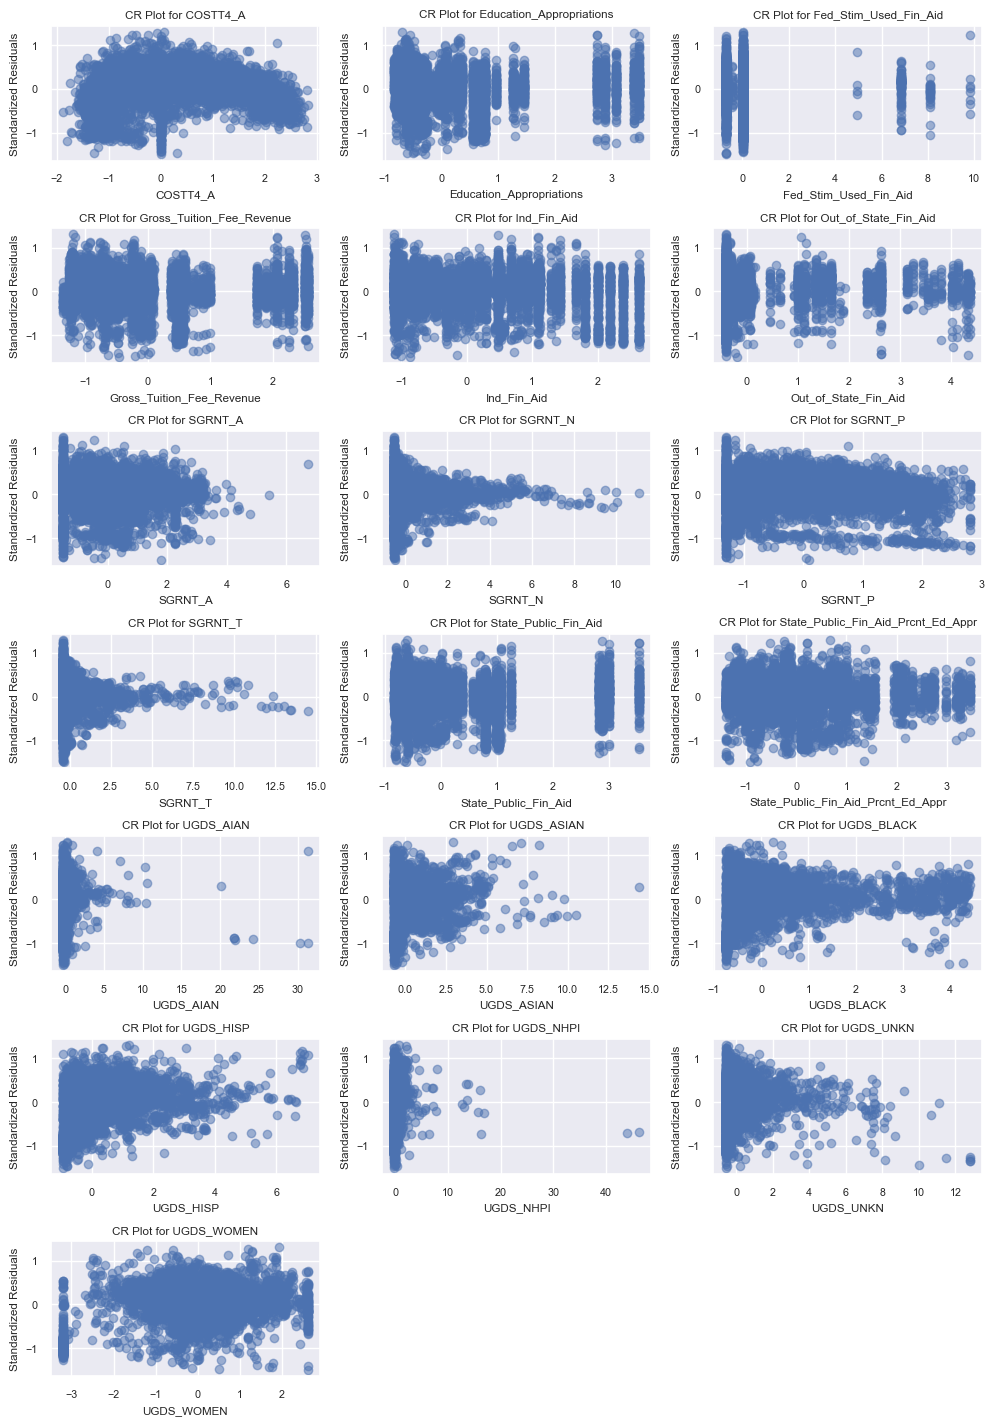

In [112]:
## Check Linearity in numerical variables

# find the residuals
res = full_model.resid_deviance

# Get predictor variable names, excluding the intercept and categorical predictors 'PCTFLOAN', 
predictor_vars = ['COSTT4_A', 'Education_Appropriations', 'Fed_Stim_Used_Fin_Aid', 'Gross_Tuition_Fee_Revenue', 'Ind_Fin_Aid', 'Out_of_State_Fin_Aid', 'SGRNT_A', 'SGRNT_N', 'SGRNT_P', 'SGRNT_T', 'State_Public_Fin_Aid', 'State_Public_Fin_Aid_Prcnt_Ed_Appr', 'UGDS_AIAN', 'UGDS_ASIAN', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_NHPI', 'UGDS_UNKN', 'UGDS_WOMEN']

# Number of rows and columns for subplots
n = len(full_model.model.exog_names)
ncols = 3
nrows = n // ncols + (n % ncols > 0)

# Create subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(10, 2 * nrows))
axs = axs.flatten()  # Flatten to 1D array for easy indexing

# Generate CR Plot for each predictor
for i, var in enumerate(predictor_vars):
    # Calculate component plus residual values
    exog_idx = full_model.model.exog_names.index(var)

    # Plot
    axs[i].scatter(full_model.model.exog[:, exog_idx], res, alpha=0.5)
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Standardized Residuals')
    axs[i].set_title(f'CR Plot for {var}')

# Hide unused subplots if any
for j in range(i + 1, nrows * ncols):
    axs[j].set_visible(False)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

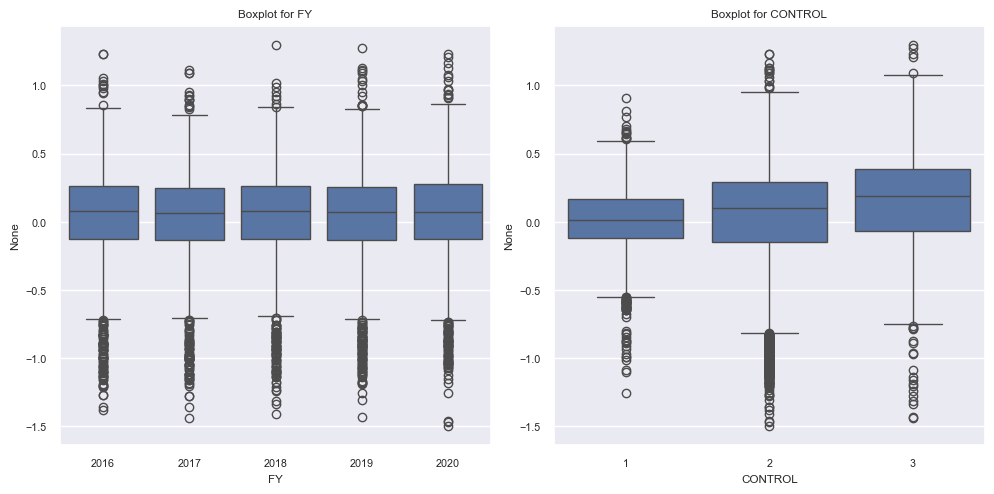

In [35]:
## Check Linearity in categorical variables

# Now, plot the boxplots for 'FY', 'PREDDEG', and 'CONTROL'
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Boxplot for 'FY'
sns.boxplot(x= X['FY'], y= res, ax=axs[0])
axs[0].set_title('Boxplot for FY')

# Boxplot for 'PREDDEG'
sns.boxplot(x= X['CONTROL'], y= res, ax=axs[1])
axs[1].set_title('Boxplot for CONTROL')

# Show the plots
plt.tight_layout()
plt.show()

### Normality Assumption

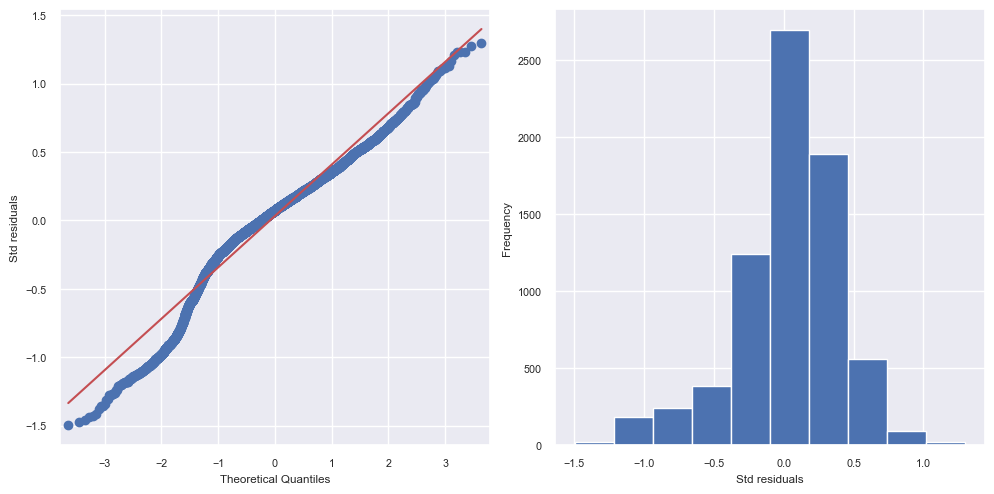

In [ ]:
# run analysis for normality
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# QQ plot
sm.qqplot(res, line='s', ax=axes[0])
axes[0].set_ylabel('Std residuals')
# Histogram
axes[1].hist(res)
axes[1].set_xlabel('Std residuals')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()